## Project description

Following our recruiting process, we would like to ask you for Take-Home Assignment.

Please use Python only for the assignment:

The data:

Given the data for the regression problem, 15 records for 15 patients:

https://drive.google.com/file/d/11JVsckOQ741y7tpPMdSvAAhMFYtnAmdg/view?usp=sharing

It includes 66 columns.

Target - 'target' (1st column)

All features are representing parameters of the human body (e.g. heart rate/respiration, etc.); they are numerical.

The tasks:

1. Explore the following AutoML algorithm given in a paper: https://arxiv.org/pdf/1911.04706.pdf
2. Implement the hyper parameter optimisation algorithm for LGBM model using an algorithm in a paper above. 
Please, use the data represented above for parameter estimation with MAE as a target metric.
Please, use grouped k-fold cross-validation for training (train on 10 sessions, validate on 5, etc.). Statistic tests are highly appreciated.
4. Provide a working virtualenv image (including requirements.txt file) for running your code.
3. Present your results of the algorithm in 3-slides presentation in pdf format.  

Bonus points*:
Make a comparison between your algorithm and Bayesian Optimisation  method (https://github.com/fmfn/BayesianOptimization) 

Please, let me know if you require additional information or further clarification regarding this matter.

## Introduction

The code below implements the FLO optimization algorithm for the LGBM model with the data mentioned above. 

### Statistical test
I did implement the statistical test, but we probably need more data to make use of it. You can also see that the performance of the model increase gradually. Therefore the difference between two consecutive steps is not significant. However, we can find a significant difference between 2 models when the separation is larger. 

### Requirements
All the libraries used for the code are listed in the first code block. 

###  Expected time for improvement (ETI)
The ETI was not strictly defined in the paper. I use the time that requires to train a single model. That time might be too short since in some cases the training is done in 2 directions. When that is the case, the threshold is tight and the algorithm might choose a larger dataset for the next training. 

### Hyperparameters, 
The chosen hyperparameter space is quite limited, however, that can be easily expanded. It is important to consider which hyperparameters are "model complexity" related and separate them from the hyperparameters that are not "model complexity" related.

### Efficiency
The main computation is around the training and no way to go around it. However given more time, I would probably improve the code and make it simpler.

 
 

 

 

### Results : 
#### Optimal model performance 5.9, 
#### The folowing table summerize the hyperparameters settings

 cmp- Avg performance:                                           5.90589
 
 cmpl:                                                [5.93, 5.31, 6.46]
 
 E- training time:                                              55.6666
 
 s- number of samples:                                           636984
 
 p:                                                                   0
 
 B:                                                             1.18921
 
 bagging_fraction:                                                  0.5
 
 boosting_type:                                                    gbdt
 
 learning_rate:                                                    0.05
 
 max_depth:                                                          15
 
 metric:                                            mean_absolute_error
 
 min_data_in_leaf:                                                  40
 
 num_leaves:                                                        17
 
 objective:                                                  regression

## Uploading libraries

In [1]:
import glob
import copy
import timeit
import statistics 
import numpy as np
import pandas as pd
import lightgbm as lgb
from scipy import stats
from random import sample 
from sklearn.model_selection import GroupKFold
from sklearn.metrics import  mean_absolute_error 

## Creating two class, one for each patient and the other class contains all the patients

In [2]:
class ParseDataPatient:
    """ 
    The ParseDataPatient object contains a single patient
    
    file_name : The name of the file that includes the data
    type file_name : str
    """
    
    def __init__(self, file_name):
        self.file_name = file_name 
        self.patient = self.read_file() 
            
    def read_file(self):
        """
        Read the Data file       
        Returns:
        patient : patient dataframe         
        """ 
        try:
            self.patient = pd.read_csv(self.file_name, 
                                       index_col = None, header = 0)
            
            # Assign a column that indicates the patient ID.
            self.patient['patient'] = int(self.file_name.replace("data\\", "").
                                          replace("_record_diast.csv", "")) 
        except IndexError:
            print ("Error: Wrong file name")
            sys.exit(2)
            
        return self.patient

     
class ListAllPatients:
    """
    The ParseDataPatient object contains all the patient's data 
    in a single object
        
    dir_name : The name of the directory that includes the files
    dir_name : str
    """
     
    def __init__(self, dir_name):         
        self.files_list = glob.glob(dir_name + "/*.csv")         
        self.frame = self.read_dir( )
        
    def read_dir(self):
        """
        Read all the *.csv files in a single directory
        
        Returns:
        :frame: patients dataframe         
  
        """ 
        li = []            
        for filename in self.files_list:
            print(filename)
            
            # Read a single file.
            df = ParseDataPatient(filename) 
            
            # Create a list of patients' data.
            li.append(df.patient)      
             
            # Concat patients data into a single data frame. 
            self.frame = pd.concat(li, axis=0,
                                   ignore_index=True).drop(['Unnamed: 0'],
                                                           axis=1) 
            
        return self.frame 
        
    def split_data(self, target, group_col, n_splits): 
        """
        Splitting the patient's data to be used for cross-validation.
        
        Parameters:
        target : name of target variable column.
        group_co : name of the column to be used as the groups.
        n_splits : number of splits.
        
        Returns:
        X : dependent variables.
        y : target variable.
        group_kfold : GroupKFold cross validation object, n_splits
        groups : the column that contain the patioent id
        """ 
        # Independent variables.  
        self.X = self.frame.drop([target], axis = 1).values 
        
        # Target variable.
        self.y = self.frame [target].values
        
        # Creating the cross-validation (5) and training (10) sets.
        self.groups = self.frame[group_col].values
        self.group_kfold = GroupKFold(n_splits = n_splits)
        self.group_kfold.get_n_splits(self.X, self.y, self.groups)
        
        return self.X, self.y, self.group_kfold, self.groups
 

## Reading Data

In [3]:
path = r'data'

all_files = glob.glob(path + "/*.csv")
 
pf = ListAllPatients(path)

X, y, group_kfold, groups = pf.split_data('target', 'patient', 3)

data\10_record_diast.csv
data\11_record_diast.csv
data\12_record_diast.csv
data\13_record_diast.csv
data\14_record_diast.csv
data\15_record_diast.csv
data\1_record_diast.csv
data\2_record_diast.csv
data\3_record_diast.csv
data\4_record_diast.csv
data\5_record_diast.csv
data\6_record_diast.csv
data\7_record_diast.csv
data\8_record_diast.csv
data\9_record_diast.csv


## Performing LGBM

## FLO algorithm

### A function that training the model and reporting the performance

In [4]:
def train_res (params, X, y, s):
    """
    Training the model and calculating the performance.
    
    Parameters:
    params: The model hyperparameters.
    X : independent variables.
    y : target variable. 
    s : sample size.     
    
    Returns:
    cm_l : list of model performance. 
    """
    cm_l = []
    
    # Cross-validation groups separated on patient ID.
    for train_index, test_index in group_kfold.split(X, y, groups):         
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Training the model.
        d_train = lgb.Dataset(X_train[0:s, :], label = y_train[0:s])  
        clf = lgb.train(params, d_train, 100) 
        y_pred = clf.predict(X_test)
        
        # Aggregating the results of the iterations as a list.
        cm_l.append(mean_absolute_error(y_test, y_pred))
 
    return sum(cm_l) / len(cm_l), cm_l


### A function that changes the Model Hyperparameters 

In [5]:
 
def prop_dir (B, p, S, Sn, c):
    """
    Propose two variations (positive, negative) for the 
    complexity-related hyperparameters.
    
    Parameters:
    B : The geometric base defines the scale of the change. 
    p : 0 for complexity-related hyperparameters, 
        complexity-not-related hyperparameters. 
    S : Complexity-related hyperparameters Space.
    Sn : Complexity-not-related hyperparameters Space.
    c : Base hyperparameters Space.
    
    Returns:
    positive (cpp) and negative (cpn) variation on the base hyperparameter.       
    """
    if p == 0:  
        # Create a random unit vector to use for the direction search
        u = unit_norm(S) 
        # We and ﬁx complexity-not-related hyperparameters.
        cpp[1].update(c[1])
        cpn[1].update(c[1])
        
        for k in S.keys():
            # Updating the new hyperparameter values.
            cpp[p][k] = c[p][k]*B**u[k]  
            cpn[p][k] = c[p][k]*B**-u[k] 

            # Adjusting values that go out of range.
            if cpp[p][k] > S[k][1]:
                cpp[p][k] = S[k][1] 
           
            if cpn[p][k] < S[k][0]:
                cpn[p][k] = S[k][0]
                
            # Hyperparameter that are larger than 1 should be integers.   
            if S[k][1] > 1: 
                cpn[p][k] = int(np.ceil(cpn[p][k]))
                cpp[p][k] = int(np.ceil(cpp[p][k]))
    else:
        # We and ﬁx complexity-related hyperparameters.
        cpp[0].update(c[0])
        cpn[0].update(c[0])
        
        # Random search for complexity-not-related hyperparameters. 
        cpp[1] = {k:sample(Sn[k],1)[0]  for k in Sn.keys()}
        cpn[1] = {k:sample(Sn[k],1)[0]  for k in Sn.keys()}
      
    return cpp, cpn

In [6]:

def unit_norm(S):
    """
    Create a length(S)-dimensional random unit vector u.
    
    Parameters: 
    S : Complexity-related hyperparameters Space.

    Returns:
    u : random normalize unit vector    
    """
    #Generating a random value for each component in the hyperparameters Space.    
    vec =[np.random.uniform(0, 1, 1)[0] for k in S.keys()]
    
    # Normalize to create a unit vector.
    mag = sum(x**2 for x in vec) ** .5
    u = {k:vec[ind]/mag  for ind, k in enumerate(S.keys())}
    
    return u

In [7]:
 
def print_FLO(t_1, Et, E, s, p, n,
              B, cm, cmU, cmpU, cml,
              params, text, performace):
    """
    Report and document the results
    
    Parameters:
    t_1 : times for the latest best conﬁgurations
    Et :  expected time for improvement for the larger sample size.
    E : expected time for improvement for the current sample size.
    s : Sample Size.
    p : Complexity-related or Complexity-not-related hyperparameters. 
    n : the counter of trials we fail to ﬁnd an improvement.  
    B : The geometric base for the change.
    cm : Avg Performance of the Last optimal model. 
    cmU : Avg Performance of the current model.
    cmpU : list of all Performance of the current model. 
    cml : list of all Performance of the Last optimal model. 
    params : hyperparameters of the last model. 
    performace : list of the performance results.
    text : just a text that include in the printout
    
    Returns:
    c: Avg Performance of the current model.
    cl: list of all Performance of the current model. 
    performace : Updated list of the performance results.
    t_1, t_0 : times for the latest two best conﬁgurations
    """
    # Update the times for the latest two best conﬁgurations.
    t_0 = t_1
    t_1 = timeit.default_timer()
    
    # Report and document model performance
    print(text)    
    print('Et =', "%.2f" % Et, 'sec', 
          ', E =', "%.2f" % E, 'sec', 
          ', Sample Size =', "%.2f" % s,
          ', p =',   p, 
          ', n =',   n, 
          ', B =',   B  
         )  
    print('Base Performance =', "%.2f" % cm ,
          ', UPDATE Performance =', "%.2f" % cmU, 
          ', p-value=', "%.2f" % stats.ttest_ind(cmpU, cml).pvalue  
         )
    print('Hyper-PARAM:', params , "\r\n")
    
    performace.append([text, Et, E, s, p, n, B, cm, cmU, cmpU, cml, params])
    
    # Update Base model parameters and performance 
    c = cmU  
    cl = cmpU
    
    return c, cl, performace, t_1, t_0
    

## FLO procedure

### Parameter settings

In [8]:
#S, Sn,c, cpp,cpn,x0, y0, params, dim, s, s0,p0, U,p, n, Et, E , B0, B

In [11]:
# Inputs
# complexity-related hyperparameters.
S = {        
     'num_leaves' : [2, 1000], 
     'num_leaves' : [2, 1000], 
     'min_data_in_leaf' : [10, 40], 
     'max_depth' : [2, 1000]
    }
# complexity-non-related hyperparameters.  
Sn = {'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1],
      'bagging_fraction' : [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
      'boosting_type' : ['gbdt'], 
      'objective' : ['regression'], 
      'metric' : ['mean_absolute_error'] 
     }

# Initialize hyperparameter Dictionaries.
c = {0:{}, 1:{}} 
c[0] = {k: S[k][0] for k in S.keys()}
c[1] = {k: Sn[k][0] for k in Sn.keys()}
cpp = copy.deepcopy(c) 
cpn = copy.deepcopy(c) 

# set the defoult model 
x0 = copy.deepcopy(c[0]) 
y0 = copy.deepcopy(c[1]) 

# default conﬁguration for non-MCP. 
# y0 = 

# Dimension of the complexity-related hyperparameters space. 
dim = [len(S), len(Sn)]
 
"""
When the dimension of the complexity-related hyperparameters 
space dim[0], is larger than 0 Start the search with the 
complexity-related hyperparameters.
"""
if dim[0] > 0:
    """
    Set the threshold U (based on the number of dimensions).  
    When n is equal to U, tries to decrease the geometric base (B)
    because we may be close to a local optimum. 
    """    
    p0 = 0   
    U =  2**(dim[0] - 1)
else:
    p0 = 1      
    U = 2**(dim[1] - 1)
p = p0


# initial sample size 
s0 = 100 
s = s0  

# Number of times we fail to ﬁnd an improvement over the current conﬁguration
n = 0 

# Geometric Base
B0 = 2
B = B0

performace = []

# TRAIN base model
t_0 = timeit.default_timer() 
cm, cml = train_res ( {**cpp[0], **cpp[1]}, X, y, s)   
t_1 = timeit.default_timer()
 
# Expected time for improvement (ETI), is 2ice the time for the small sample.  
E = t_1 - t_0
Et = 2*E 

# Report and document model performance
cm, cml, performace, t_1, t_0 = print_FLO(t_1,  Et, E, s, p, n,
                                          B, cm, cm, cml, cml,
                                          {**cpp[0], **cpp[1]},
                                          'BASE MODEL',performace)

for i in range (0, 50) :
    
    # The condition for increasing the sample size
    print(i)
    if E <= Et:
        
        # Tune the complexity-related hyperparameters    
        if p == 0:
 
            # Propose two directions candidates  
            cpp, cpn = prop_dir (B, p, S, Sn, c )   
            
        # Tune the complexity-not-related hyperparameters
        elif p == 1: 
            
            #Propose two directions candidates  
            cpp, cpn = prop_dir (B, p, S, Sn, c )
        
        # TRAIN the model on the positive direction
        cmp, cmpl = train_res ({**cpp[0], **cpp[1]}, X, y, s)       
        
        # Performance improve on the posetive direction
        if cmp < cm:    
            
            """
            Update the times for the latest two best conﬁgurations.
            Report and document model performance 
            Update Base model parameters and performance""" 
 
            cm, cml, performace, t_1, t_0 = print_FLO(t_1,  Et, E, s, p, n, 
                                                      B, cm, cmp, cmpl, cml, 
                                                      {**cpp[0], **cpp[1]},
                                                      'UPDATE C+',performace)
            # Update the base model.
            c[p].update(cpp[p]) 
            
        # TRAIN the model on the negative direction.
        else:     
            print('No Improvment for C+', "\r\n")
            cmn, cmnl = train_res ({**cpn[0], **cpn[1]}, X, y, s)              
 
            # When performance improve on the negative direction.
            if  cmn < cm:
            
                """ 
                Update the times for the latest two best conﬁgurations.                
                Report and document model performance.                
                Update Base model parameters and performance."""
                
                cm, cml, performace, t_1, t_0 = print_FLO(t_1,  Et, E, s, p, n, 
                                                          B, cm, cmn, cmnl, cml, 
                                                          {**cpn[0], **cpn[1]},
                                                     'UPDATE C-',performace)
                # Update the base model.
                c[p].update(cpn[p]) 
            
            """When performance does not improves on the 
            negative or positive direction."""  
            else:
                
                """Switch between complexity-related and 
                complexity-not-related hyperparameters."""
                print('No Improvment for C-', "\r\n")
                p = 1 - p
                print('update p =', p)
                
                # If no hyperparameters, switch back. 
                if dim[p] == 0:                     
                    p = 1 - p
                    print('update p =', p)
                    
                if p == 1 or dim[1] == 0 :
                    
                    # When no performance improves, update the counter.
                    n += 1     
                    
                    # Report model performance. 
                    print( 'update n =', n)                      
                    
                    # If the counter reaches the threshold.
                    if n == U:
                        """Tries to decrease the geometric base B because 
                        model may be close to a local optimum.""" 
                        print( 'Model might be close to a local optimum')
                        
                        # Reset the search.
                        n = 0
                        B = np.sqrt(B)
                        print( 'update B=', B)
                        
                        """When B is so small that the expected change in all 
                        dimensions in one iteration is smaller than 1.""" 
                        if B <= min([(1 + 1/c[0][k])**np.sqrt(dim[0])  
                                     for k in S.keys()] ):  
                             
                            """When search is reset, we would like to move 
                            quickly to unexplored space, increase geometric 
                            base B."""
                            B0 = min( B0**2, max([(k[1]/k[0])**np.sqrt(dim[0]) 
                                                  for k in S.values()] ))
                            B = B0 #  
                            print('update B=',B)
                            
                            # Update the Base parameters with defoult values.  
                            if dim[0] > 0:                                 
                                c[0] = copy.deepcopy(x0)
                                print('update c0=', c[0])
                            else:                                
                                c[1] = copy.deepcopy(y0) 
                                print('update c1=',c[1])                             
                            params.update({**c[0], **c[1]})
                            p = p0
                            s = s0
                            print('Model reset, update to defoult values')
                            
    # Expected time for improvement reaches the threshold.        
    else: 
        # Increase the training size
        s = 2*s 
        if s > len(y):
            s = len(y)

        # TRAIN the model on the new size, the hyperparameters of the base model            .
        t_0 = timeit.default_timer()
        cms, cmsl = train_res ({**c[0], **c[1]}, X, y, s)
        t_1 = timeit.default_timer() 
 
        # When performance improve on the new size.
        if cms < cm: 
             # Report and document model performance.
            cm, cml, performace, t_3, t_2 = print_FLO(t_1,  Et, E, s, p, n, 
                                                 B, cm, cms, cmsl, cml, 
                                                 {**cpp[0], **cpp[1]},
                                                 'UPDATE SIZE',performace)            
            print('Performance Improve by UPDATE SIZE' , "\r\n")  
        else :
            print('No Improvment for UPDATE SIZE' , "\r\n")
             
        Et = 2*(t_1 - t_0)

    t_t = timeit.default_timer()
    E = max(t_t - t_1, t_1 - t_0)

BASE MODEL
Et = 10.21 sec , E = 5.11 sec , Sample Size = 100.00 , p = 0 , n = 0 , B = 2
Base Performance = 12.84 , UPDATE Performance = 12.84 , p-value= 1.00
Hyper-PARAM: {'min_data_in_leaf': 10, 'bagging_fraction': 0.3, 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'max_depth': 2, 'metric': 'mean_absolute_error', 'num_leaves': 2, 'objective': 'regression'} 

0
UPDATE C+
Et = 10.21 sec , E = 5.11 sec , Sample Size = 100.00 , p = 0 , n = 0 , B = 2
Base Performance = 12.84 , UPDATE Performance = 12.75 , p-value= 0.95
Hyper-PARAM: {'min_data_in_leaf': 15, 'metric': 'mean_absolute_error', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'max_depth': 3, 'bagging_fraction': 0.3, 'num_leaves': 4, 'objective': 'regression'} 

1
No Improvment for C+ 

No Improvment for C- 

update p = 1
update n = 1
2
No Improvment for UPDATE SIZE 

3
UPDATE C+
Et = 11.22 sec , E = 5.61 sec , Sample Size = 200.00 , p = 1 , n = 1 , B = 2
Base Performance = 12.75 , UPDATE Performance = 12.31 , p-value= 0.76
Hy

No Improvment for C+ 

No Improvment for C- 

update p = 1
update n = 1
41
No Improvment for UPDATE SIZE 

42
No Improvment for C+ 

No Improvment for C- 

update p = 0
43
No Improvment for UPDATE SIZE 

44
No Improvment for C+ 

No Improvment for C- 

update p = 1
update n = 2
45
No Improvment for UPDATE SIZE 

46
No Improvment for C+ 

No Improvment for C- 

update p = 0
47
No Improvment for C+ 

No Improvment for C- 

update p = 1
update n = 3
48
No Improvment for UPDATE SIZE 

49
No Improvment for C+ 

No Improvment for C- 

update p = 0


In [30]:
%matplotlib inline

In [12]:

df = pd.DataFrame(performace, columns = ['update_type','Et', 
                                         'E', 's', 'p', 'n', 
                                         'B', 'cm', 'cmp', 
                                         'cmpl', 'cml', 'params'])

In [31]:
df.to_csv('Vule_oop_time_parm_eleg.csv')

In [32]:
df.head()

,update_type,Et,E,s,p,n,B,cm,cmp,cmpl,cml,params
0,BASE MODEL,10.213341,5.106671,100,0,0,2.0,12.840694,12.840694,"[11.635620753069576, 12.144943992746574, 14.74...","[11.635620753069576, 12.144943992746574, 14.74...","{'min_data_in_leaf': 10, 'bagging_fraction': 0..."
1,UPDATE C+,10.213341,5.106671,100,0,0,2.0,12.840694,12.752547,"[11.620175509328472, 12.107697298016223, 14.52...","[11.635620753069576, 12.144943992746574, 14.74...","{'min_data_in_leaf': 15, 'metric': 'mean_absol..."
2,UPDATE C+,11.218535,5.609268,200,1,1,2.0,12.752547,12.308913,"[10.978002819345942, 11.648563075609387, 14.30...","[11.620175509328472, 12.107697298016223, 14.52...","{'min_data_in_leaf': 15, 'metric': 'mean_absol..."
3,UPDATE C+,11.218535,5.531890,200,1,1,2.0,12.308913,11.999252,"[10.705543266063271, 11.519763468903992, 13.77...","[10.978002819345942, 11.648563075609387, 14.30...","{'min_data_in_leaf': 15, 'metric': 'mean_absol..."
4,UPDATE C+,11.218535,5.918579,200,1,1,2.0,11.999252,11.453574,"[10.221830379798249, 11.251743784071353, 12.88...","[10.705543266063271, 11.519763468903992, 13.77...","{'min_data_in_leaf': 15, 'metric': 'mean_absol..."


In [81]:
df_n = pd.concat([df[['update_type','E','s','p','B', 'cmp' , 'cmpl']],
                  df['params'].apply(pd.Series)], axis=1, join='inner')
df_n.head()

,update_type,E,s,p,B,cmp,cmpl,bagging_fraction,boosting_type,learning_rate,max_depth,metric,min_data_in_leaf,num_leaves,objective
0,BASE MODEL,5.106671,100,0,2.0,12.840694,"[11.635620753069576, 12.144943992746574, 14.74...",0.3,gbdt,0.001,2,mean_absolute_error,10,2,regression
1,UPDATE C+,5.106671,100,0,2.0,12.752547,"[11.620175509328472, 12.107697298016223, 14.52...",0.3,gbdt,0.001,3,mean_absolute_error,15,4,regression
2,UPDATE C+,5.609268,200,1,2.0,12.308913,"[10.978002819345942, 11.648563075609387, 14.30...",0.3,gbdt,0.005,3,mean_absolute_error,15,4,regression
3,UPDATE C+,5.531890,200,1,2.0,11.999252,"[10.705543266063271, 11.519763468903992, 13.77...",0.5,gbdt,0.010,3,mean_absolute_error,15,4,regression
4,UPDATE C+,5.918579,200,1,2.0,11.453574,"[10.221830379798249, 11.251743784071353, 12.88...",0.7,gbdt,0.100,3,mean_absolute_error,15,4,regression


Text(0, 0.5, 'mean_absolute_error')

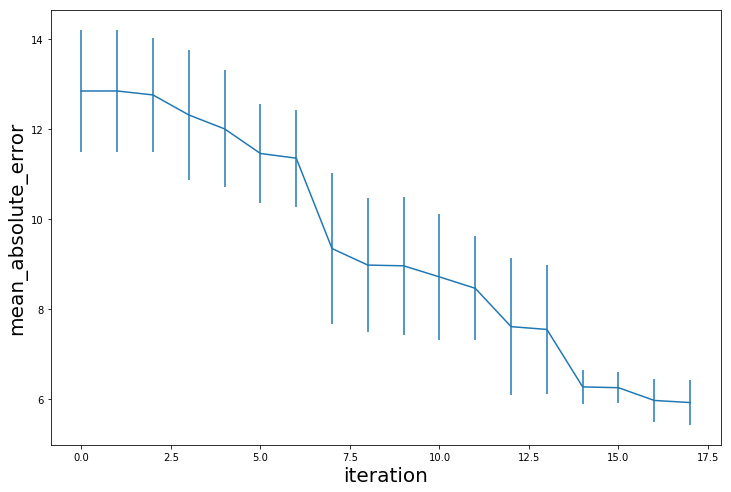

In [20]:
ax = df['cml'].apply(np.mean).plot(figsize=(12,8), 
                                   yerr = df['cml'].apply(np.std), 
                                   legend = False)
ax.set_xlabel("Iteration", fontsize=20)
ax.set_ylabel("mean_absolute_error", fontsize=20)

### Figure 1: The performance of the model on the y-axis improves (as the mean_absolute_error decrease) with respect to the number of iterations on the x-axis. The bars represent the standard deviation (n=3).

Text(0, 0.5, 'mean_absolute_error')

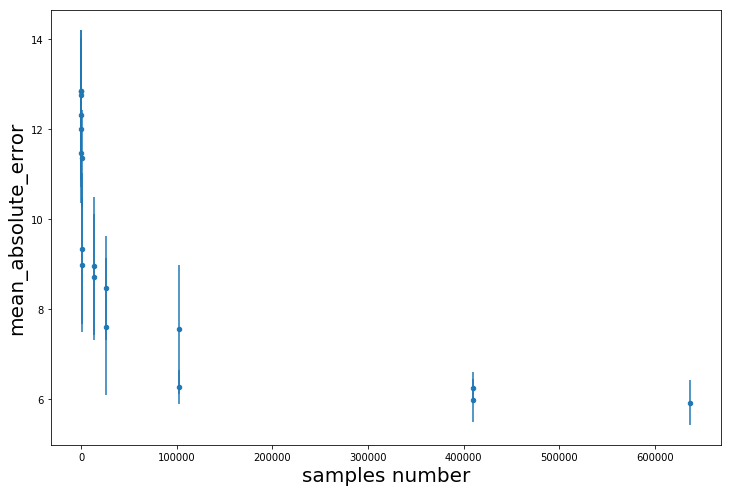

In [66]:
df_r = pd.concat([df[['s','cm']], df['cml'].apply(np.std)], 
                 axis=1, join='inner') 

ax = df_r.plot.scatter(figsize=(12, 8), x='s', y='cm',  
                       yerr='cml', legend=False)
ax.set_xlabel("samples number", fontsize=20)
ax.set_ylabel("mean_absolute_error", fontsize=20)

### Figure 2: The performance of the model on the y-axis improves (as the mean_absolute_error decrease) with respect to the number of samples on the x-axis. The bars represent the standard deviation (n=3).

Text(0, 0.5, 'mean_absolute_error')

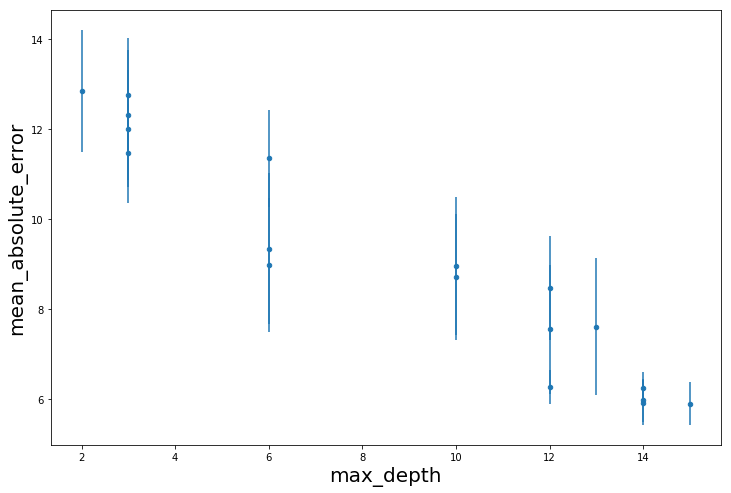

In [48]:
df_r = pd.concat([df_n[['max_depth','cmp']], 
                  df_n['cmpl'].apply(np.std)], 
                 axis=1, join='inner') 

ax = df_r.plot.scatter(figsize=(12, 8), x='max_depth',
                       y='cmp', yerr='cmpl', legend=False)
ax.set_xlabel("max_depth", fontsize=20)
ax.set_ylabel("mean_absolute_error", fontsize=20)

### Figure 3: The performance of the model on the y-axis improves (as the mean_absolute_error decrease) with respect to the max-depth on the x-axis. The bars represent the standard deviation (n=3).


Text(0, 0.5, 'mean_absolute_error')

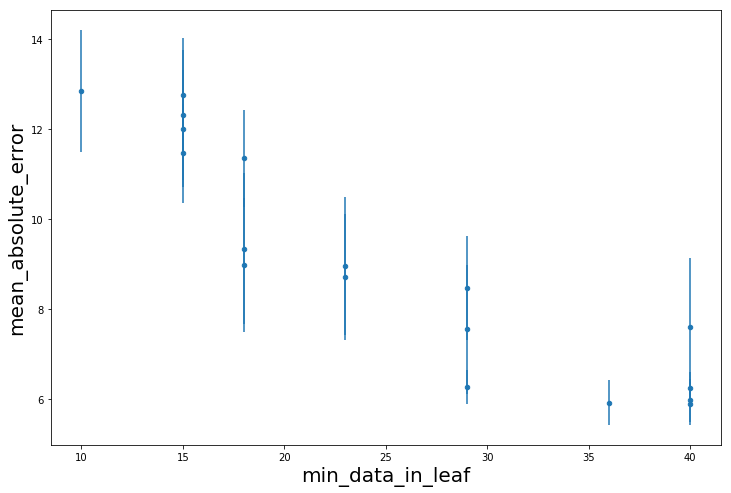

In [51]:
df_r = pd.concat([df_n[['min_data_in_leaf', 'cmp']], 
                  df_n['cmpl'].apply(np.std)], 
                 axis=1, 
                 join='inner') 

ax = df_r.plot.scatter(figsize=(12,8), x='min_data_in_leaf',
                       y='cmp', yerr='cmpl', legend=False )
ax.set_xlabel("min_data_in_leaf", fontsize=20)
ax.set_ylabel("mean_absolute_error", fontsize=20)

### Figure 3: The performance of the model on the y-axis improves (as the mean_absolute_error decrease) with respect to the min_data_in_leaf on the x-axis. The bars represent the standard deviation (n=3).

Text(0, 0.5, 'mean_absolute_error')

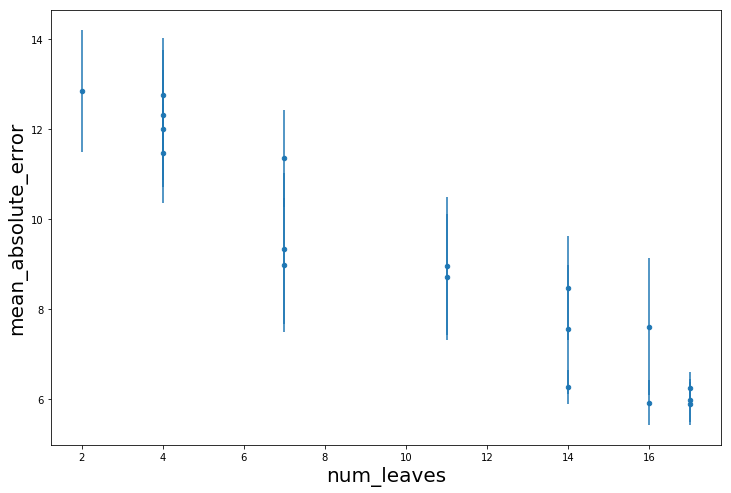

In [63]:
df_r = pd.concat([df_n[['num_leaves','cmp']],
                  df_n['cmpl'].apply(np.std)], 
                 axis=1, join='inner') 

ax = df_r.plot.scatter(figsize=(12,8),
                       x=  'num_leaves',
                       y = 'cmp', 
                       yerr =  'cmpl', 
                       legend = False)

ax.set_xlabel("num_leaves", fontsize=20)
ax.set_ylabel("mean_absolute_error", fontsize=20)

### Figure 3: The performance of the model on the y-axis improves (as the mean_absolute_error decrease) with respect to the num_leaves on the x-axis. The bars represent the standard deviation (n=3).

In [ ]:
[df_n.iloc[ -1,:]]

In [80]:
df_n = pd.concat([df[['update_type', 'E', 's', 'p', 'B', 'cmp']],
                  df['params'].apply(pd.Series) 
                  [['bagging_fraction', 'learning_rate', 
                    'max_depth', 'min_data_in_leaf',
                    'num_leaves']]], axis=1, join='inner')
df_n

,update_type,E,s,p,B,cmp,bagging_fraction,learning_rate,max_depth,min_data_in_leaf,num_leaves
0,BASE MODEL,5.106671,100,0,2.000000,12.840694,0.3,0.001,2,10,2
1,UPDATE C+,5.106671,100,0,2.000000,12.752547,0.3,0.001,3,15,4
2,UPDATE C+,5.609268,200,1,2.000000,12.308913,0.3,0.005,3,15,4
3,UPDATE C+,5.531890,200,1,2.000000,11.999252,0.5,0.010,3,15,4
4,UPDATE C+,5.918579,200,1,2.000000,11.453574,0.7,0.100,3,15,4
5,UPDATE C+,10.740806,200,0,2.000000,11.349701,0.7,0.100,6,18,7
6,UPDATE SIZE,17.223575,400,0,2.000000,9.343983,0.7,0.100,6,18,7
7,UPDATE SIZE,26.863648,800,0,2.000000,8.977455,0.6,0.005,6,18,7
8,UPDATE C+,7.040232,800,0,2.000000,8.961204,0.7,0.100,10,23,11
9,UPDATE SIZE,18.430718,12800,0,1.414214,8.715116,0.9,0.050,10,23,11
